In [665]:
# Import libraries
import pandas as pd           # Data manipulation and analysis
import numpy as np            # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns         # Statistical data visualization
import warnings               # Warning control
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output


In [666]:
# Define file path
file_path = r'C:\Users\garne\Downloads\Supermarket Customers.csv'

# Load the dataset with the specified delimiter (tab-separated)
df = pd.read_csv( file_path, delimiter='\t')

# View the first and last few rows of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


- **There are inconsistencies in the format of the Dt_Customer column.** 

In [667]:
# Shows the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Supermarket Customers Data Dictionary

## People
- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

## Products
- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

## Promotion
- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if the customer accepted the offer in the last campaign, 0 otherwise

## Place
- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalog
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month


# 1.Data cleaning

### 1.1 Formating the Dt_Customer column to the correct format 

In [668]:
# Convert Dt_Customer to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Show a view top rows of the formated Dt_Customer column 
print(df['Dt_Customer'].head())


0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


### 1.2 Checking for duplicates

In [669]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
# Shows the number of duplication
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


- **There are not any duplicates in the dataset**
<br>
The data cleaning process is continue without dropping any duplications 

### 1.2 Checking for missing values

In [670]:
# Display columns with missing values and their counts
missing_value = df.isnull().sum()
missing_values = missing_value[missing_value > 0]  # Filter to show only columns with missing values
# Shows all column and the number of the missing values
print(missing_value)
# Shows only the column with missing values and the number of the missing values
print("\nColumns with missing values and their counts:")
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Columns with missing values and their counts:
Income    24
dtype: int64


- **There are 24 missing values in the "Income" column**

### 1.2.1 Finding the best method to treat the missing values


Mean, Median, and Comparison:
                            Mean   Median
Original            52247.251354  51381.5
Filled with Mean    52247.251354  51741.5
Filled with Median  52237.975446  51381.5


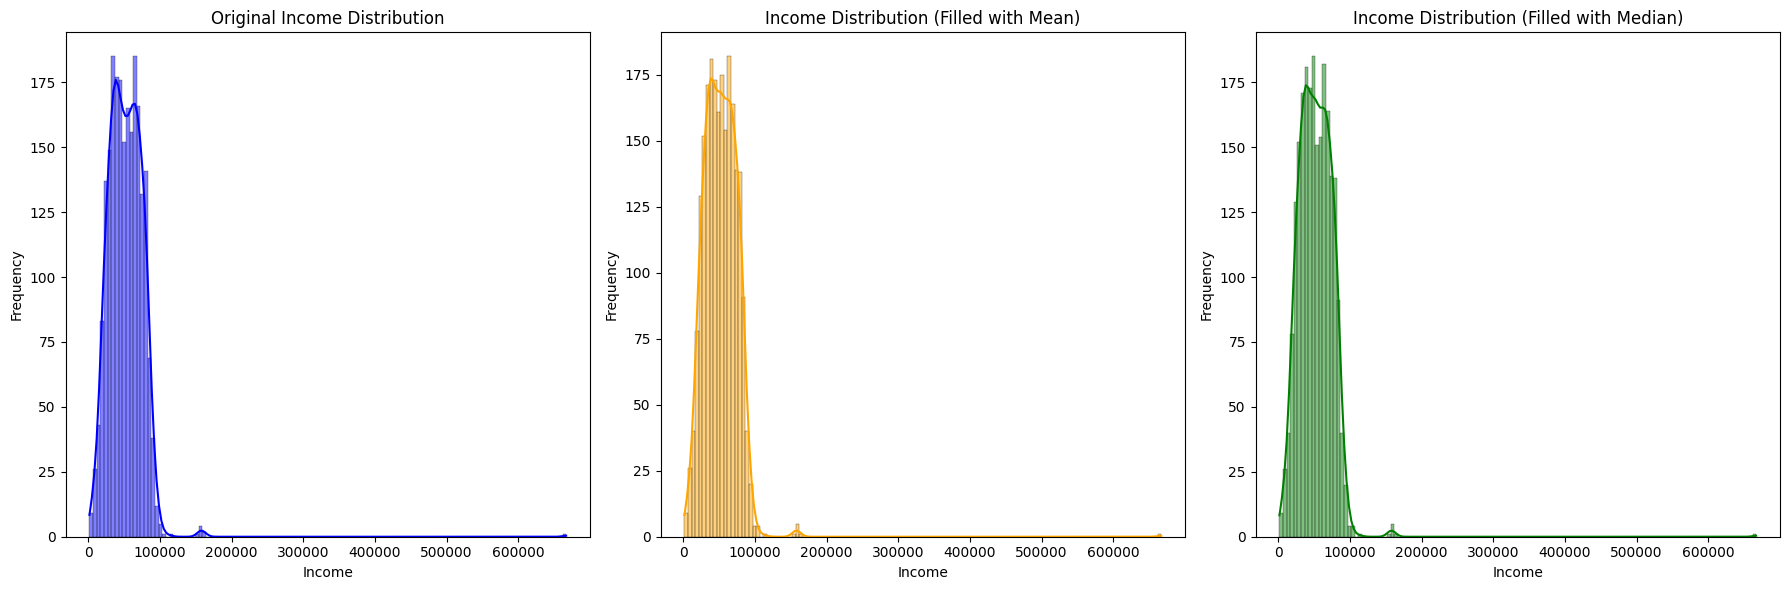

In [671]:
# Step 1: Filling missing values with Median
df_filled_median = df.copy()
df_filled_median['Income'].fillna(df_filled_median['Income'].median(), inplace=True)

# Step 2: Filling missing values with Mean
df_filled_mean = df.copy()
df_filled_mean['Income'].fillna(df_filled_mean['Income'].mean(), inplace=True)

# Step 3: Calculate Mean and Median for original, mean-filled, and median-filled datasets
mean_median_comparison = {
    "Original": {
        "Mean": df['Income'].mean(),
        "Median": df['Income'].median(),
    },
    "Filled with Mean": {
        "Mean": df_filled_mean['Income'].mean(),
        "Median": df_filled_mean['Income'].median(),
    },
    "Filled with Median": {
        "Mean": df_filled_median['Income'].mean(),
        "Median": df_filled_median['Income'].median(),
    }
}

# Step 4: Display Mean and Median Comparison
comparison_df = pd.DataFrame(mean_median_comparison).T
print("\nMean, Median, and Comparison:")
print(comparison_df)

# Step 5: Plotting the distributions
plt.figure(figsize=(18, 6))

# Original DataFrame distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Income'], kde=True, color='blue')
plt.title('Original Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Filled with Mean distribution
plt.subplot(1, 3, 2)
sns.histplot(df_filled_mean['Income'], kde=True, color='orange')
plt.title('Income Distribution (Filled with Mean)')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Filled with Median distribution
plt.subplot(1, 3, 3)
sns.histplot(df_filled_median['Income'], kde=True, color='green')
plt.title('Income Distribution (Filled with Median)')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- **Filling with median is the best method, because it does not significantly alter the data as much as filling it with mean**

### 1.2.2 Filling the missing values with median

In [672]:
# Fill missing values in Income with the median
df['Income'].fillna(df['Income'].median(), inplace=True)
# Double-check and show the Income column after filling missing values
print(f"Number of missing values in 'Income' column: {df['Income'].isnull().sum()}")



Number of missing values in 'Income' column: 0


- **There are not any missing values after treatment**

### 1.3 Treating Outliers

### 1.3.1 Checking outliers on the column Year_Birth

Oldest Customer Age: 122
Youngest Customer Age: 19


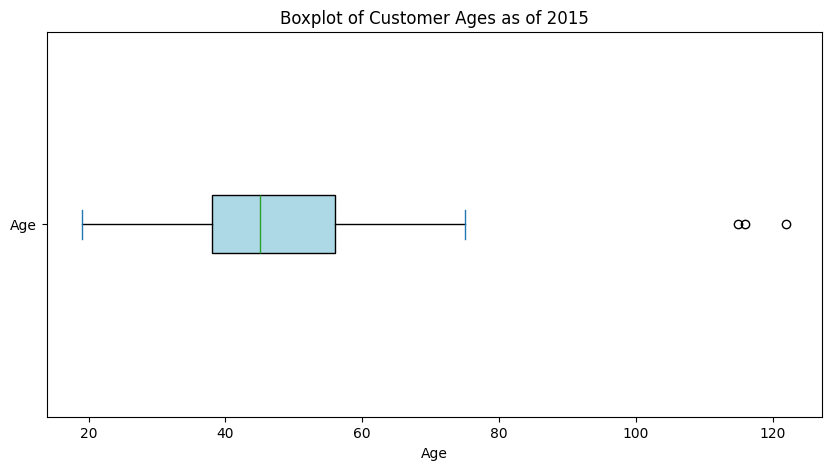

In [673]:
# Step 1: Calculate the age of each customer as of 2015
# 2015 is chosen because it is after the last transaction year (2014)
# Since 2014 was not yet finished, 2015 is used as the reference year
df['Age'] = 2015 - df['Year_Birth']

# Step 2: Identify the oldest and youngest ages
oldest_age = df['Age'].max()  # Find the maximum age (oldest customer)
youngest_age = df['Age'].min()  # Find the minimum age (youngest customer)

# Print the ages of the oldest and youngest customers
print(f"Oldest Customer Age: {oldest_age}")
print(f"Youngest Customer Age: {youngest_age}")

# Step 3: Create a boxplot of the ages
# The boxplot shows the distribution of customer ages
plt.figure(figsize=(10, 5))  # Set the size of the plot
df['Age'].plot(kind='box', vert=False, patch_artist=True, 
                  boxprops=dict(facecolor='lightblue', color='black'),  # Box color settings
                  whiskerprops=dict(color='black'))  # Whisker color settings
plt.title('Boxplot of Customer Ages as of 2015')  # Title of the plot
plt.xlabel('Age')  # Label for the x-axis

# Show the boxplot
plt.show()

- **There are some unrealistic customer ages in the column Year_Birth (above 100)**

### 1.3.1.a Cleaning the outliers from Year_Birth column <br> (Deleting above 100 years old) 

Number of entries removed: 3


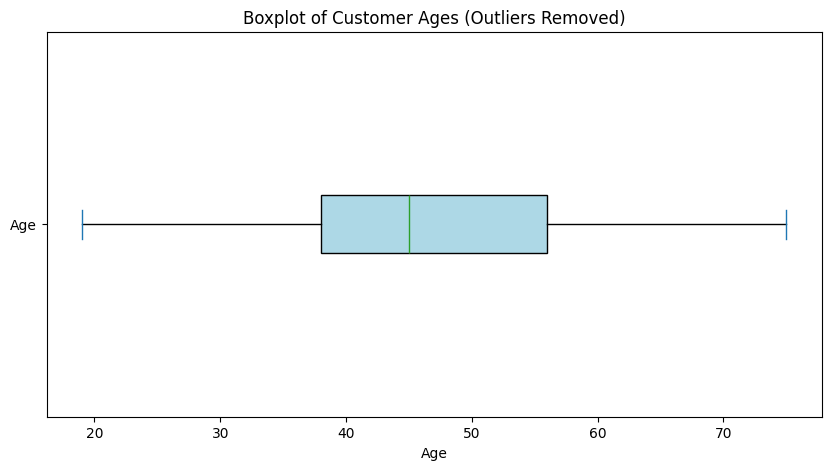

Total number of rows after removing outliers: 2237


In [674]:
# Step 1: Calculate the age of each customer as of 2015
df['Age'] = 2015 - df['Year_Birth']

# Step 2: Directly filter out customers older than 100 years
original_row_count = df.shape[0]  # Record the original number of rows
df = df[df['Age'] <= 100]  # Filter out customers older than 100 years

# Step 3: Calculate and print the number of removed entries
num_removed = original_row_count - df.shape[0]  # Number of rows removed
print(f"Number of entries removed: {num_removed}")  # Display the count of removed entries

# Step 4: Create a boxplot of the ages after removing outliers
plt.figure(figsize=(10, 5))  # Set the plot size
df['Age'].plot(kind='box', vert=False, patch_artist=True, 
                  boxprops=dict(facecolor='lightblue', color='black'),  # Customizing the box color
                  whiskerprops=dict(color='black'))  # Customizing the whisker color
plt.title('Boxplot of Customer Ages (Outliers Removed)')  # Title of the plot
plt.xlabel('Age')  # Label for the x-axis

# Show the boxplot
plt.show()

# Step 5: Find the total number of rows in the cleaned DataFrame
total_rows = df.shape[0]
print(f"Total number of rows after removing outliers: {total_rows}")


### 1.3.2 Checking outliers on the column Income

Number of outliers identified: 8


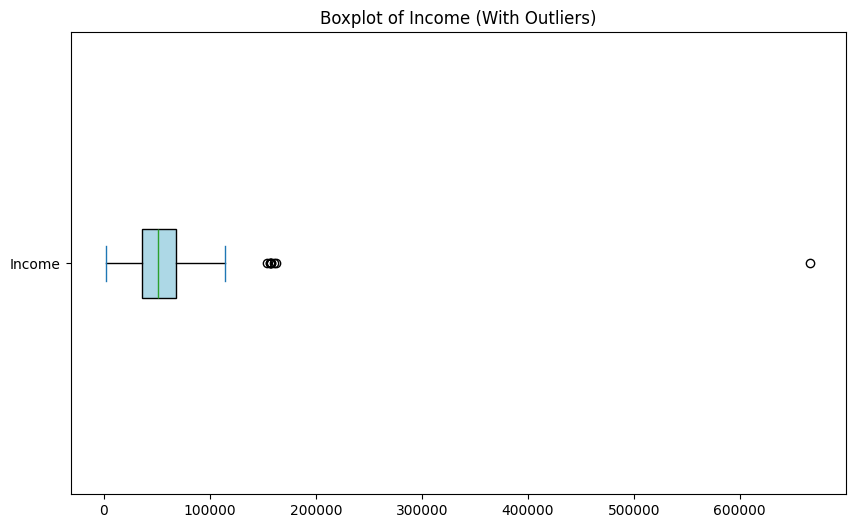

In [675]:
# Step 1: Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

# Step 5: Print the number of outliers identified
print(f"Number of outliers identified: {outliers.shape[0]}")

# Step 6: Optionally, print the outliers if you want to inspect them
# print(outliers[['Income']])

# Step 7: Create a boxplot to visualize outliers
plt.figure(figsize=(10, 6))
df['Income'].plot(kind='box', vert=False, patch_artist=True, 
                  boxprops=dict(facecolor='lightblue', color='black'),
                  whiskerprops=dict(color='black'))
plt.title('Boxplot of Income (With Outliers)')

# Show the boxplot
plt.show()


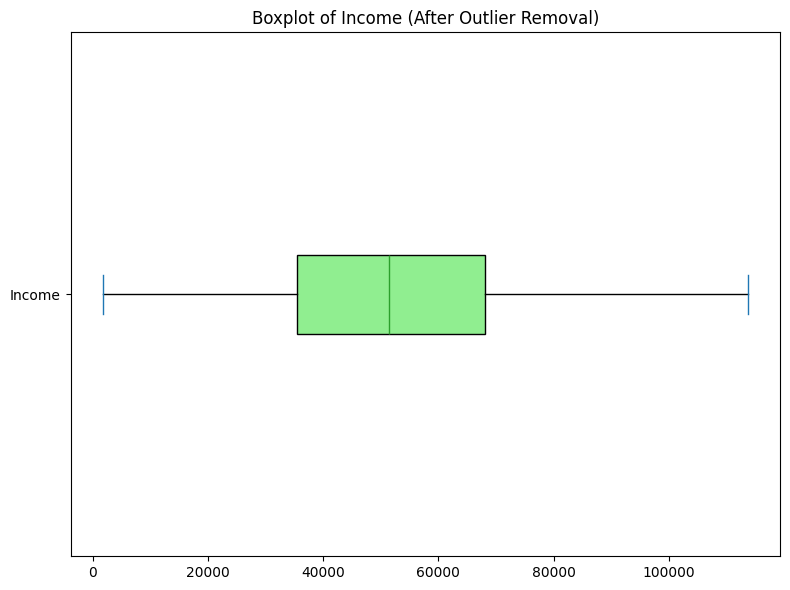

Number of outliers after removal: 0
Empty DataFrame
Columns: [Income]
Index: []
Total number of rows after removing outliers: 2229


In [676]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Remove outliers directly from the df by filtering based on the bounds
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Step 5: Plot the boxplot for income after removing outliers
plt.figure(figsize=(8, 6))

# Boxplot for income after removing outliers
df['Income'].plot(kind='box', vert=False, patch_artist=True, 
                  boxprops=dict(facecolor='lightgreen', color='black'),
                  whiskerprops=dict(color='black'))

# Title and show plot
plt.title('Boxplot of Income (After Outlier Removal)')
plt.tight_layout()
plt.show()

# Step 6: Identify any outliers in the cleaned data (after direct removal)
# This check should return an empty dataframe since outliers have already been removed
outliers_after_removal = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

# Step 7: Print the number of outliers (should be zero if all outliers were removed)
print(f"Number of outliers after removal: {outliers_after_removal.shape[0]}")

# Optional: To see the actual outlier values (should be empty if no outliers remain)
print(outliers_after_removal[['Income']])

# Step 8: Find the total number of rows in the cleaned DataFrame
total_rows = df.shape[0]
print(f"Total number of rows after removing outliers: {total_rows}")


MntWines: 35 outliers, 1.57% of total data
MntFruits: 247 outliers, 11.08% of total data
MntMeatProducts: 173 outliers, 7.76% of total data
MntFishProducts: 223 outliers, 10.00% of total data
MntSweetProducts: 240 outliers, 10.77% of total data
MntGoldProds: 206 outliers, 9.24% of total data


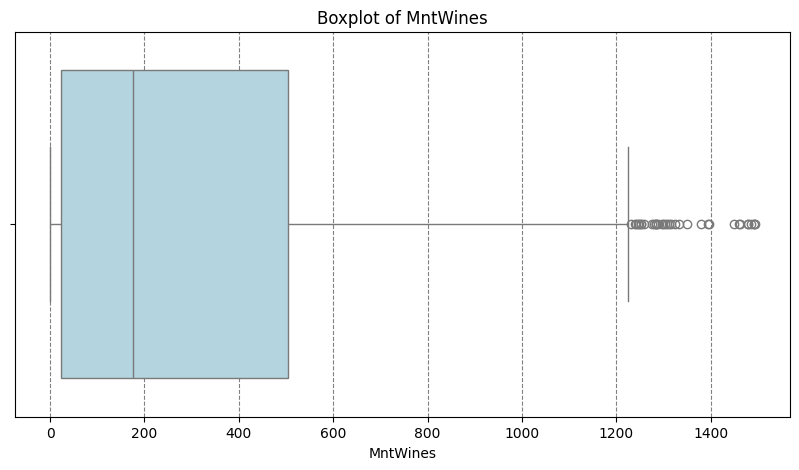

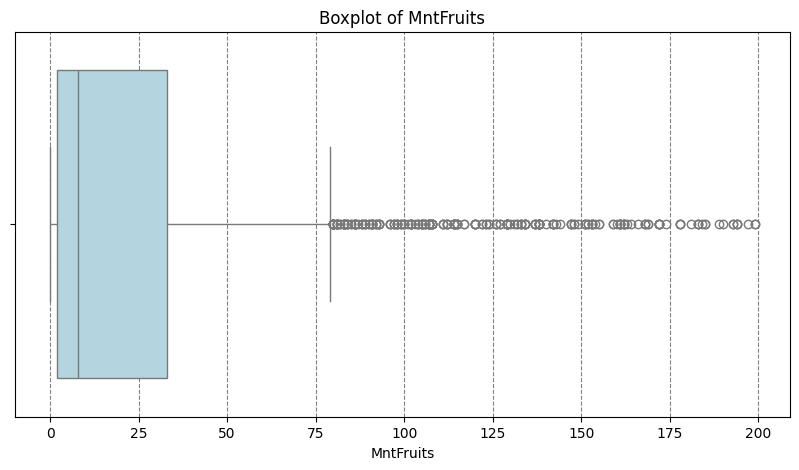

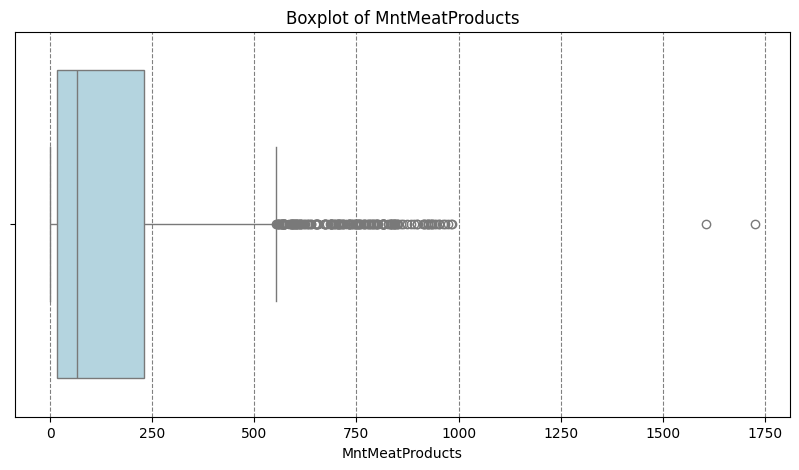

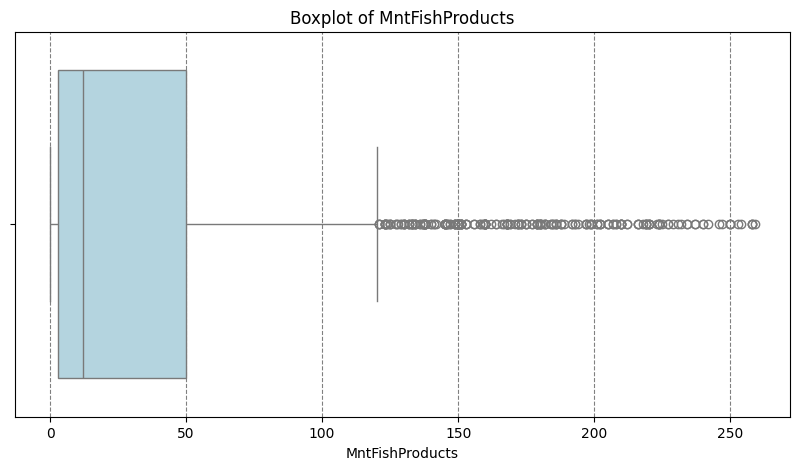

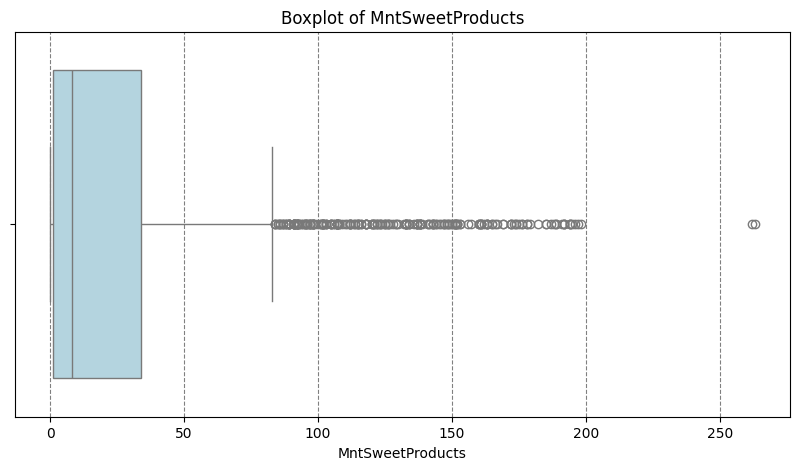

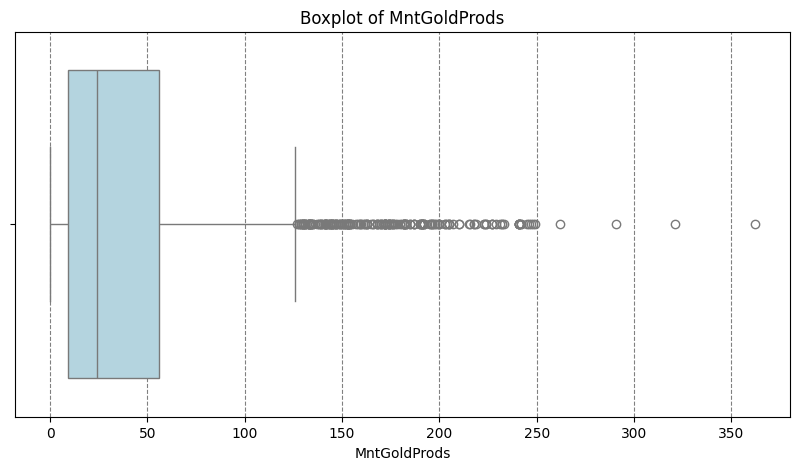

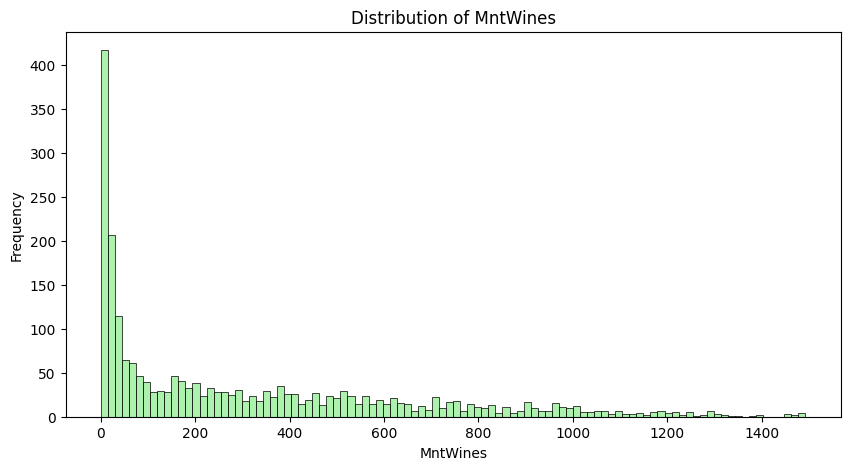

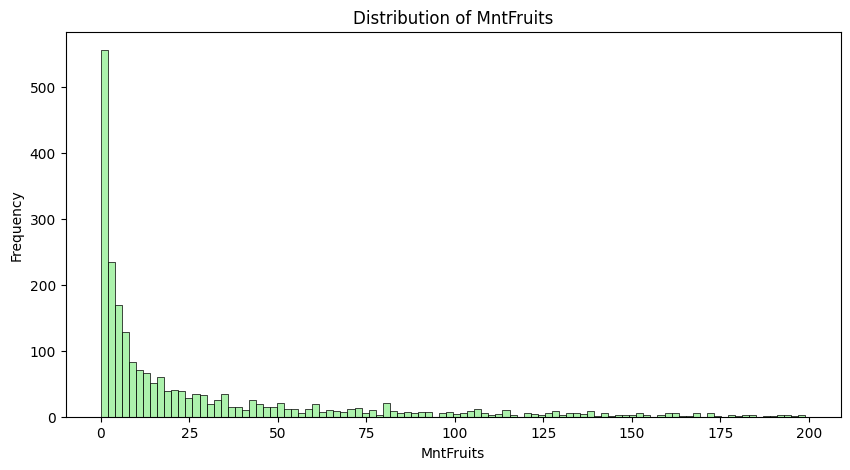

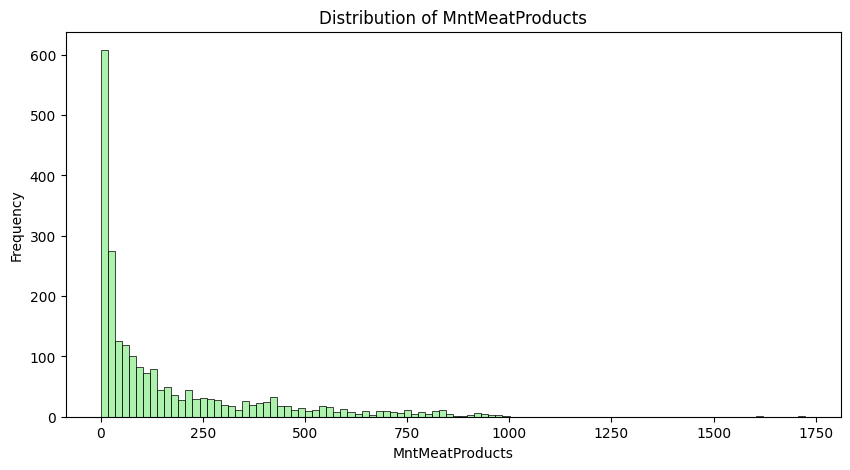

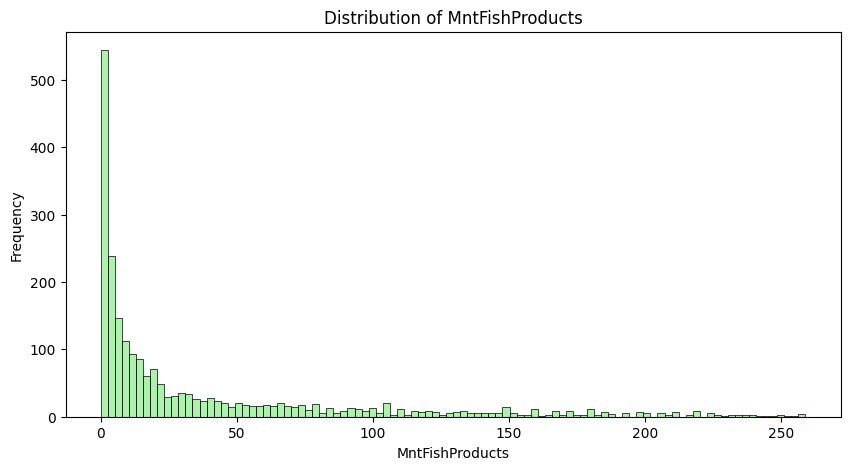

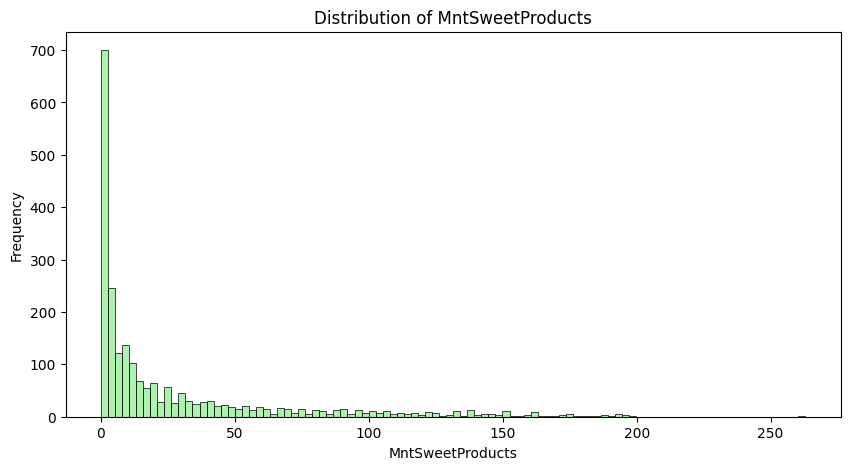

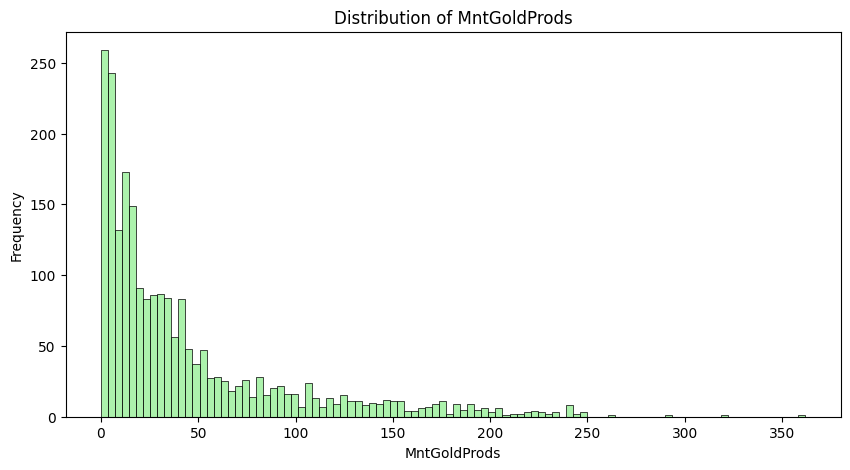

In [677]:
# Identify the column to check
columns_to_check = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Total number of data points in the DataFrame
total_points = df.shape[0]

# Step 1: Identify outliers using the IQR method and calculate percentages
for col in columns_to_check:
    # Calculate Q1, Q3, IQR, and outlier bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    percentage_outliers = (num_outliers / total_points) * 100
    
    # Print the number and percentage of outliers
    print(f"{col}: {num_outliers} outliers, {percentage_outliers:.2f}% of total data")

# Step 2: Create boxplots for each column
for col in columns_to_check:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(axis='x', linestyle='--', color='gray')  # Add x-axis grid lines
    plt.show()

# Step 3: Create histograms for the distribution of each column
for col in columns_to_check:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=False, bins=100, color='lightgreen')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


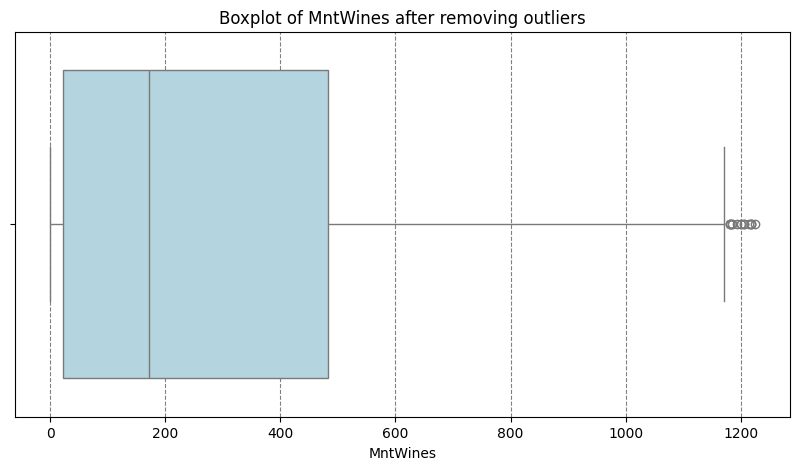

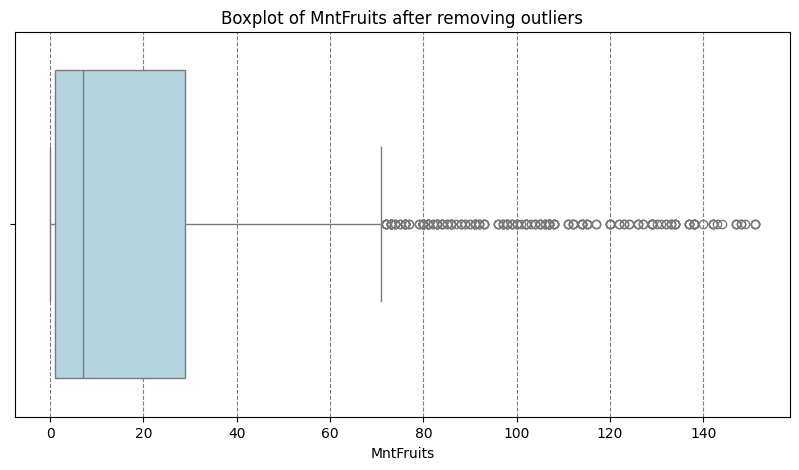

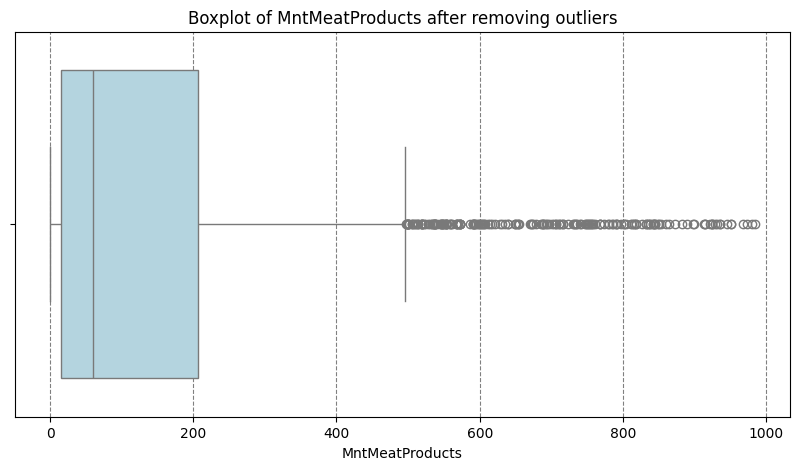

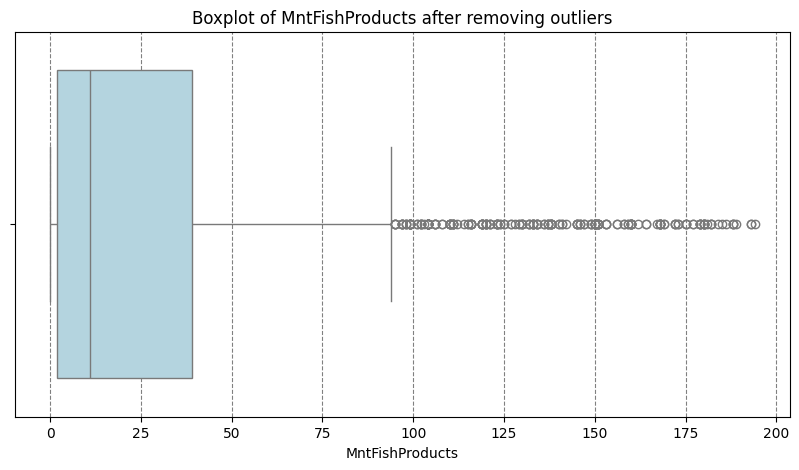

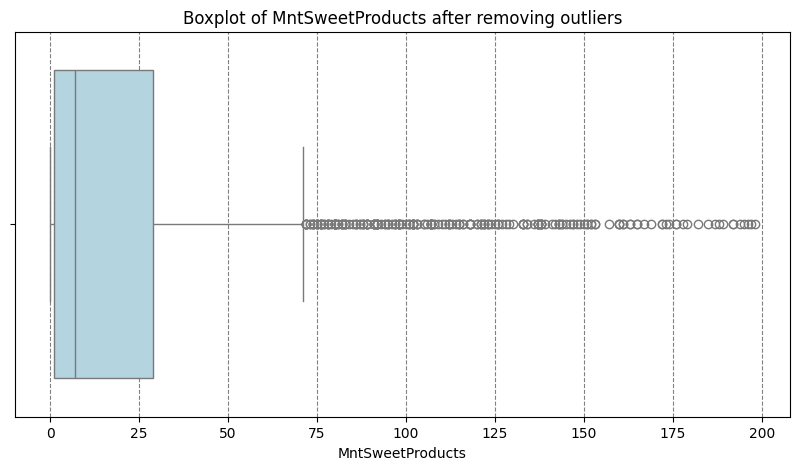

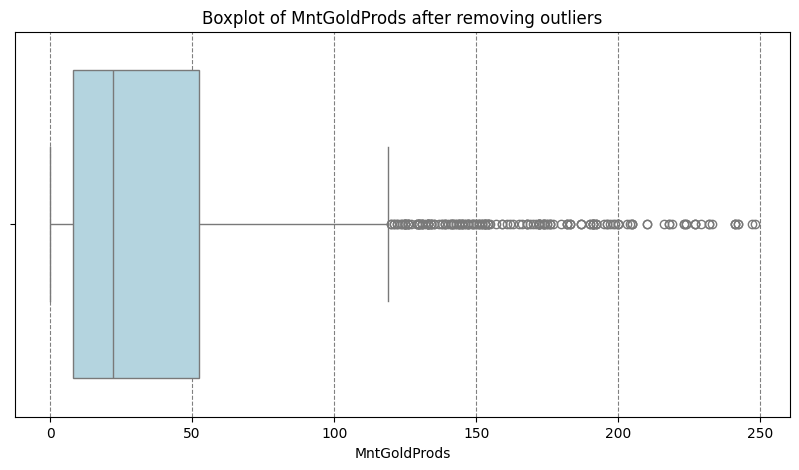

Column: MntWines, Removed: 35 rows, 1.57% of total
Column: MntFruits, Removed: 54 rows, 2.42% of total
Column: MntMeatProducts, Removed: 2 rows, 0.09% of total
Column: MntFishProducts, Removed: 54 rows, 2.42% of total
Column: MntSweetProducts, Removed: 2 rows, 0.09% of total
Column: MntGoldProds, Removed: 3 rows, 0.13% of total
Total rows removed: 150, Total percent removed: 6.73%
Current number of rows in the DataFrame: 2079


In [678]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column, iqr_multiplier):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # Filter rows within bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Function to remove rows above a specific threshold (for extreme values)
def remove_above_threshold(df, column, threshold):
    df = df[df[column] <= threshold]
    return df

# Function to remove outliers based on a percentile threshold
def remove_above_percentile(df, column, percentile):
    threshold = df[column].quantile(percentile / 100)
    df = df[df[column] <= threshold]
    return df

# Initialize
total_rows = df.shape[0]
total_removed_rows = 0
total_removed_percentage = 0
outputs = []

# Define removal rules for each column
columns_removal_rules = {
    'MntWines': {'method': 'iqr', 'value': 1.5},         # Normal IQR method
    'MntFruits': {'method': 'percentile', 'value': 97.5}, # Top 2.5% threshold
    'MntMeatProducts': {'method': 'threshold', 'value': 1000}, # Above 1000
    'MntFishProducts': {'method': 'percentile', 'value': 97.5}, # Top 2.5% threshold
    'MntSweetProducts': {'method': 'threshold', 'value': 200},  # Above 200
    'MntGoldProds': {'method': 'threshold', 'value': 250}      # Above 250
}

# Process each column based on the specified rules
for column, rule in columns_removal_rules.items():
    if total_removed_percentage >= 10:
        break  # Stop if more than 10% of rows are removed

    initial_rows = df.shape[0]  # Capture the initial number of rows before modification

    # Apply the correct removal method
    if rule['method'] == 'iqr':
        df = remove_outliers_iqr(df, column, rule['value'])
    elif rule['method'] == 'threshold':
        df = remove_above_threshold(df, column, rule['value'])
    elif rule['method'] == 'percentile':
        df = remove_above_percentile(df, column, rule['value'])

    removed_rows = initial_rows - df.shape[0]
    removed_percentage = (removed_rows / total_rows) * 100

    # Check if removing rows for this column would exceed 10% total
    if total_removed_percentage + removed_percentage > 10:
        max_removal = int(0.1 * total_rows) - total_removed_rows
        df = df.iloc[:-max_removal]  # Retain up to max_removal rows
        removed_rows = max_removal
        removed_percentage = (removed_rows / total_rows) * 100
    
    total_removed_rows += removed_rows
    total_removed_percentage += removed_percentage
    outputs.append(f"Column: {column}, Removed: {removed_rows} rows, {removed_percentage:.2f}% of total")

    # Display boxplot after outlier removal
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=column, color='lightblue')
    plt.title(f'Boxplot of {column} after removing outliers')
    plt.grid(axis='x', linestyle='--', color='gray')
    plt.show()

# Final summary
outputs.append(f"Total rows removed: {total_removed_rows}, Total percent removed: {total_removed_percentage:.2f}%")

# Print the results
for output in outputs:
    print(output)
    
# Print the current number of rows after all operations
print(f"Current number of rows in the DataFrame: {df.shape[0]}")


# 2. Data Analysis

### 2.1 Who (Customer Demographics & Profile)

**Objective:** Understand customer characteristics to tailor marketing strategies effectively.

**a) Age Analysis**


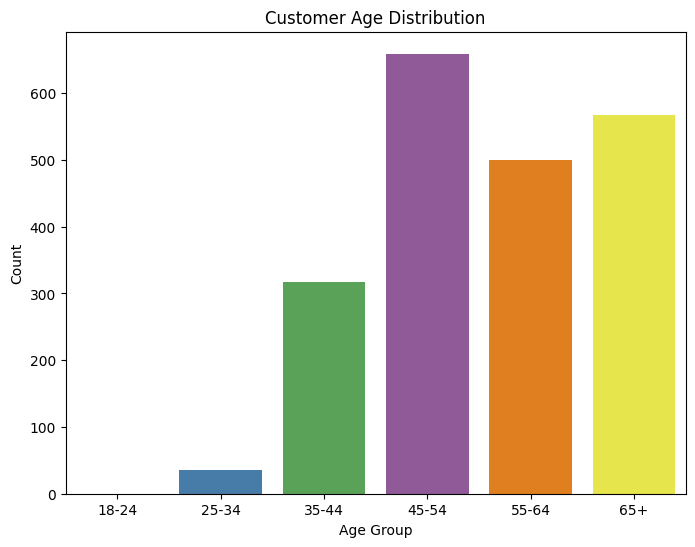

count    2079.000000
mean       55.076960
std        11.593319
min        28.000000
25%        47.000000
50%        54.000000
75%        64.500000
max        84.000000
Name: Age, dtype: float64


In [679]:
# Calculate age based on 'Year_Birth' (assuming 'Year_Birth' is a column in the dataset)
current_year = 2024  # Update to the current year
df['Age'] = current_year - df['Year_Birth']

# Create age groups
age_bins = [18, 24, 34, 44, 54, 64, 100]  # Age brackets
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display distribution of age groups
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='AgeGroup', palette='Set1')
plt.title('Customer Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Display basic statistics for age
print(df['Age'].describe())


**b) Marital Status**

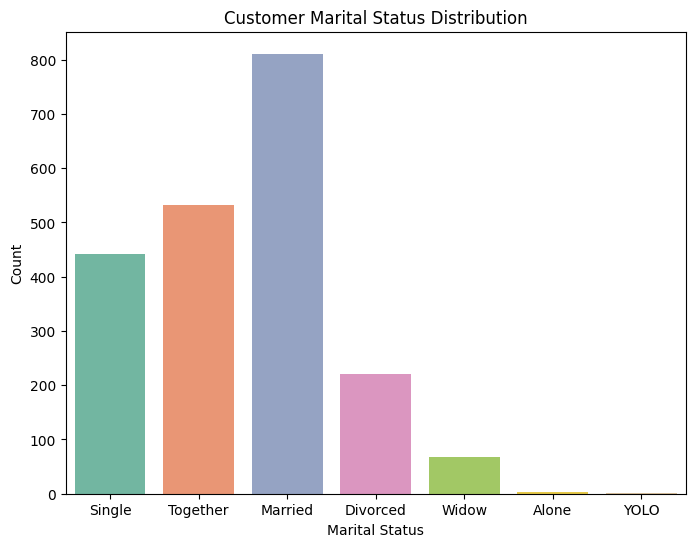

In [680]:
# Segment by marital status and display the distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Marital_Status', palette='Set2')
plt.title('Customer Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


**c) Household Composition (Children and Teens)**

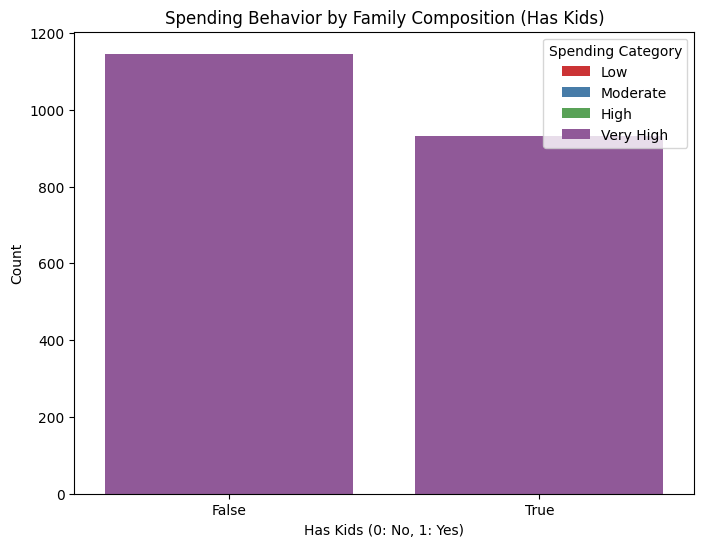

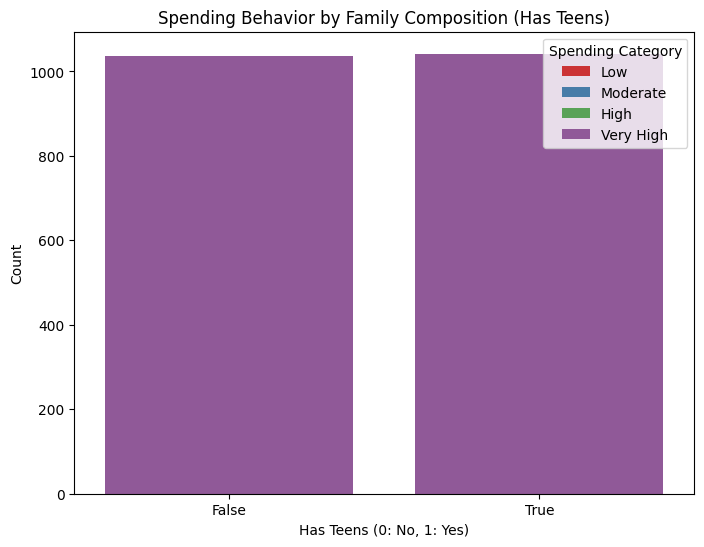

In [681]:
# Define spending categories based on Monetary values
df['SpendingCategory'] = pd.cut(df['Income'], 
                                bins=[0, 100, 500, 1000, float('inf')], 
                                labels=['Low', 'Moderate', 'High', 'Very High'])

# Create a new feature to categorize families based on children and teens
df['HasKids'] = df['Kidhome'] > 0
df['HasTeens'] = df['Teenhome'] > 0

# Display the relationship between family composition and spending categories
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='HasKids', hue='SpendingCategory', palette='Set1')
plt.title('Spending Behavior by Family Composition (Has Kids)')
plt.xlabel('Has Kids (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Spending Category', loc='upper right')
plt.show()

# Display the relationship between teenagers in household and spending
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='HasTeens', hue='SpendingCategory', palette='Set1')
plt.title('Spending Behavior by Family Composition (Has Teens)')
plt.xlabel('Has Teens (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Spending Category', loc='upper right')
plt.show()


**d) Income Segmentation**

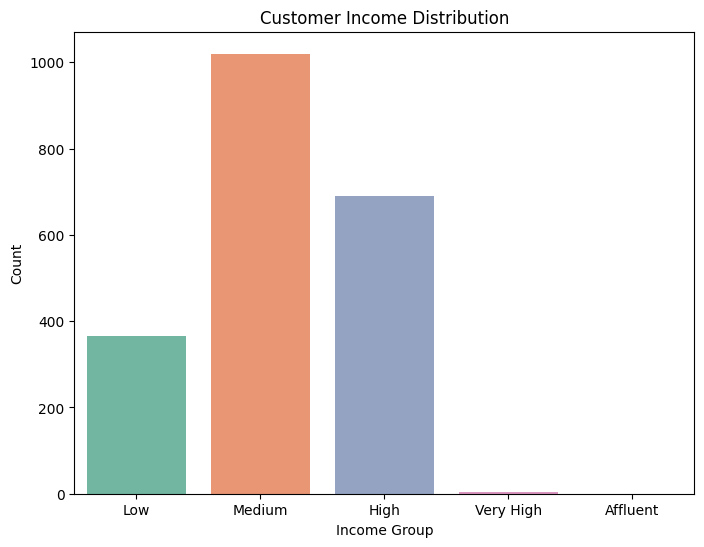

In [682]:
# Create income brackets for analysis (adjust based on actual data)
income_bins = [0, 30000, 60000, 100000, 200000, 500000]
income_labels = ['Low', 'Medium', 'High', 'Very High', 'Affluent']
df['IncomeGroup'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

# Display the distribution of income groups
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='IncomeGroup', palette='Set2')
plt.title('Customer Income Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()


**e) Education Segmentation**

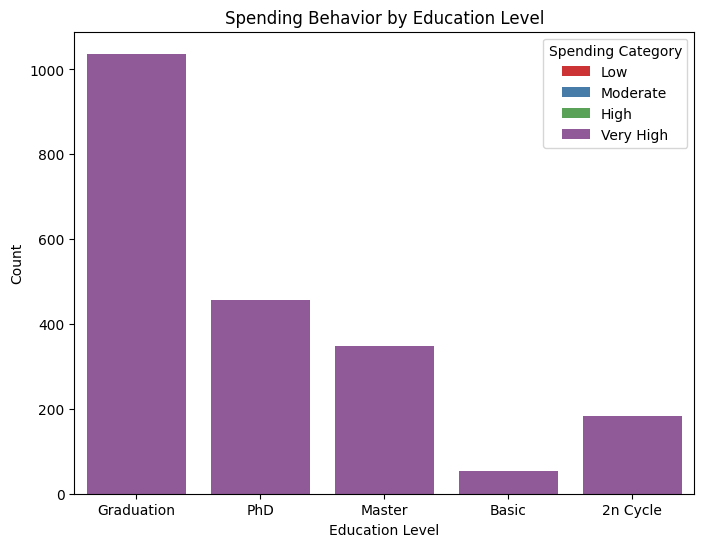

In [683]:
# Display the relationship between education level and spending behavior
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Education', hue='SpendingCategory', palette='Set1')
plt.title('Spending Behavior by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Spending Category', loc='upper right')
plt.show()


**Actionable Insights**:
- Profile high-value customers based on demographic segments (age, marital status, income).
- Tailor marketing offers to high-income or family-oriented customers (e.g., premium wines for affluent singles, or discounts on kid-focused products for parents).


### 2.2 What (Customer Spending Patterns)


**Objective:** Identify key product categories and where revenue is generated.

**a) Total Expenditure**

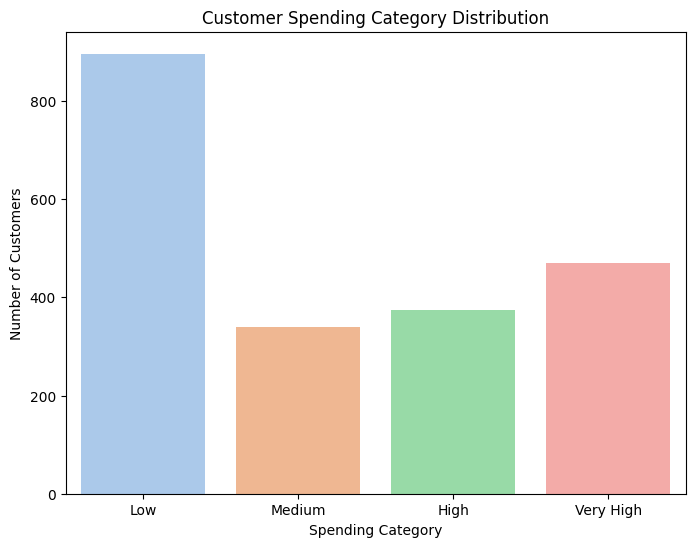

In [684]:
# Calculate Total Expenditure for each customer
df['TotalExpenditure'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Classify customers into spending categories
df['SpendingCategory'] = pd.cut(df['TotalExpenditure'], bins=[0, 200, 500, 1000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

# Distribution of spending categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SpendingCategory', palette="pastel")
plt.title("Customer Spending Category Distribution")
plt.xlabel("Spending Category")
plt.ylabel("Number of Customers")
plt.show()


**b) Spending by Product Category**

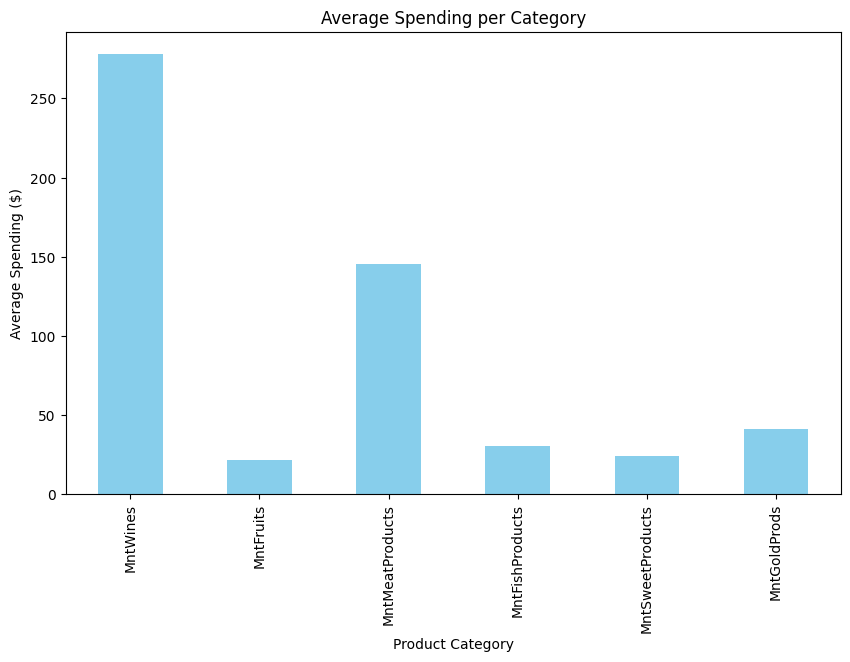

In [685]:
# Calculate mean spending per product category
category_means = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Plot spending by category
plt.figure(figsize=(10, 6))
category_means.plot(kind='bar', color='skyblue')
plt.title("Average Spending per Category")
plt.xlabel("Product Category")
plt.ylabel("Average Spending ($)")
plt.show()


**c) Spending Segmentation by High-Value Products**


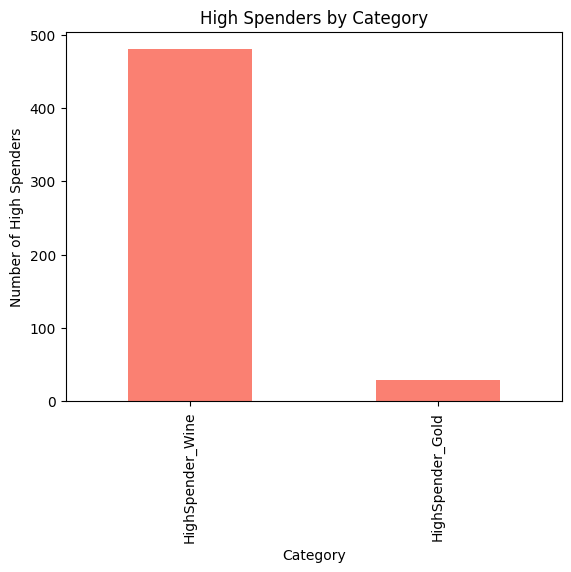

In [686]:
# Define threshold for high spenders in each category
high_spender_threshold = {
    'MntWines': 500,
    'MntGoldProds': 200
}

# Flag high spenders in each key category
df['HighSpender_Wine'] = df['MntWines'] > high_spender_threshold['MntWines']
df['HighSpender_Gold'] = df['MntGoldProds'] > high_spender_threshold['MntGoldProds']

# Count high spenders in each category
high_spenders_counts = df[['HighSpender_Wine', 'HighSpender_Gold']].sum()
high_spenders_counts.plot(kind='bar', color='salmon')
plt.title("High Spenders by Category")
plt.xlabel("Category")
plt.ylabel("Number of High Spenders")
plt.show()


**Actionable Insights**:
- Focus product promotions on categories with high total expenditure.
- Tailor offers for high-value categories (e.g., exclusive discounts on gold products for affluent customers).
- Cross-sell related products: e.g., customers who buy wine often buy meat or fish.

### 3. When (Customer Purchase Recency and Engagement)


**Objective:** Understand customer activity to improve engagement and retention.


**a) Recency Analysis**

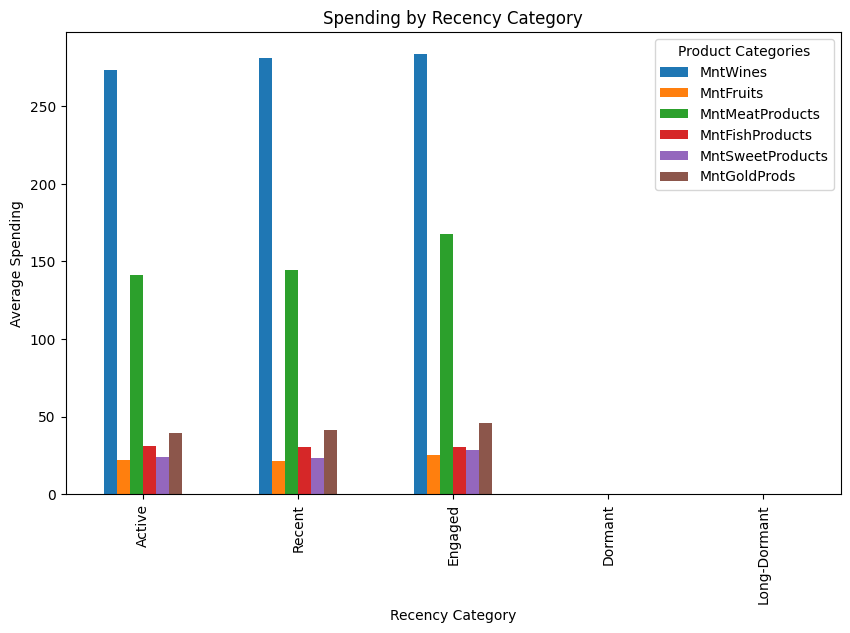

In [687]:
# Segment customers by recency of last purchase
df['RecencyCategory'] = pd.cut(df['Recency'], bins=[0, 30, 90, 180, 365, 1000], labels=['Active', 'Recent', 'Engaged', 'Dormant', 'Long-Dormant'])

# Recency vs. Spending
recency_spending = df.groupby('RecencyCategory').agg({
    'MntWines': 'mean', 
    'MntFruits': 'mean', 
    'MntMeatProducts': 'mean', 
    'MntFishProducts': 'mean', 
    'MntSweetProducts': 'mean', 
    'MntGoldProds': 'mean'
}).reset_index()

# Plot recency vs spending
recency_spending.set_index('RecencyCategory').plot(kind='bar', figsize=(10,6), stacked=False)
plt.title('Spending by Recency Category')
plt.xlabel('Recency Category')
plt.ylabel('Average Spending')
plt.legend(title='Product Categories')
plt.show()


**b) Tenure Analysis Using Enrollment Date**

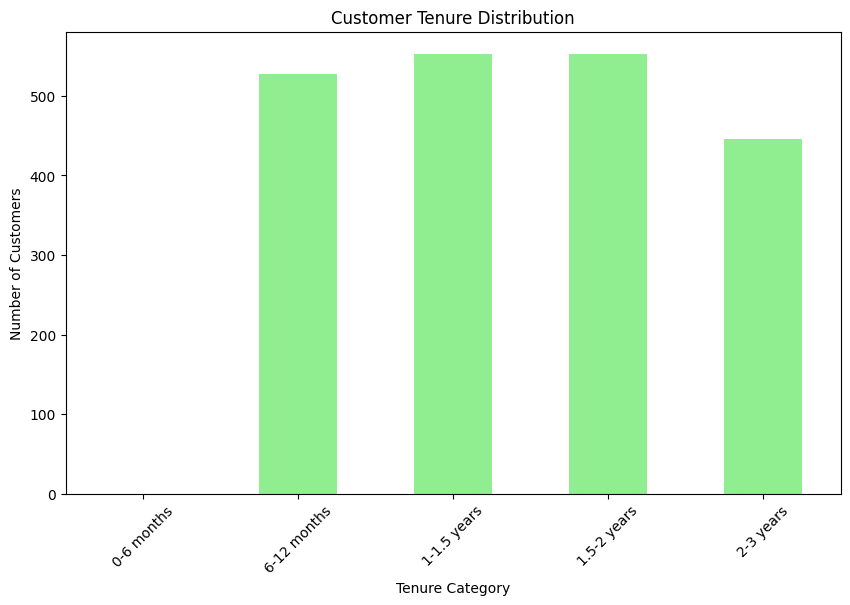

In [688]:
from datetime import datetime

# Define a fixed reference date (e.g., December 31, 2014)
reference_date = datetime(2014, 12, 31)

# Calculate tenure in years using the reference date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['TenureYears'] = (reference_date - df['Dt_Customer']).dt.days / 365

# Define tenure bins for more detailed categories (every 6 months up to 2 years, then yearly)
df['TenureCategory'] = pd.cut(
    df['TenureYears'], 
    bins=[0, 0.5, 1, 1.5, 2, float('inf')], 
    labels=[
        '0-6 months', 
        '6-12 months', 
        '1-1.5 years', 
        '1.5-2 years', 
        '2-3 years'
    ]
)

# Plot distribution of Tenure Categories
plt.figure(figsize=(10, 6))
df['TenureCategory'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure Category")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


**c) Campaign Response Analysis**

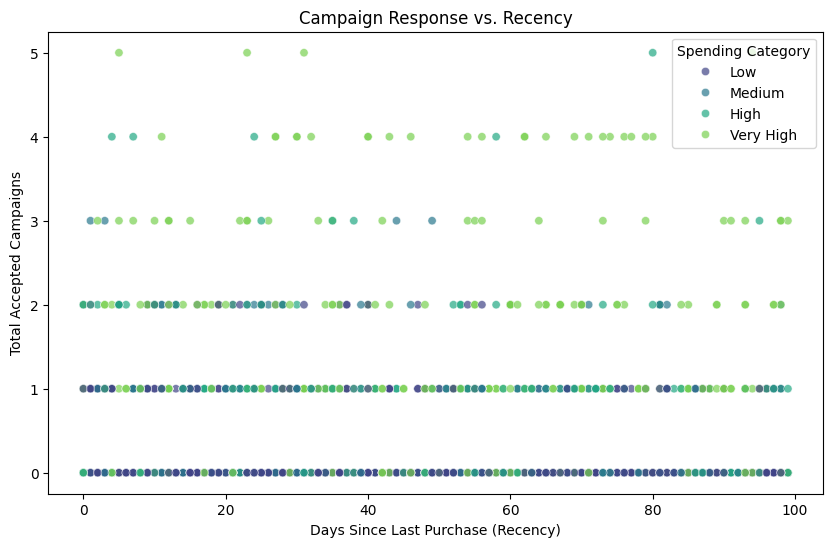

In [689]:
# Count total accepted campaigns per customer
df['TotalAcceptedCampaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Plotting Recency vs. Total Accepted Campaigns to see if recency influences response
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Recency', y='TotalAcceptedCampaigns', hue='SpendingCategory', palette='viridis', alpha=0.7)
plt.title("Campaign Response vs. Recency")
plt.xlabel("Days Since Last Purchase (Recency)")
plt.ylabel("Total Accepted Campaigns")
plt.legend(title="Spending Category")
plt.show()


**Actionable Insights**:
- Re-engage dormant customers (high recency) with personalized offers.
- Target long-term customers with loyalty programs or exclusive promotions.
- Optimize campaign timing based on past acceptance patterns.

### 4. Where (Shopping Channels)

**Objective:** Understand channel preferences to optimize marketing and sales strategies.


**a) Channel Preferences**

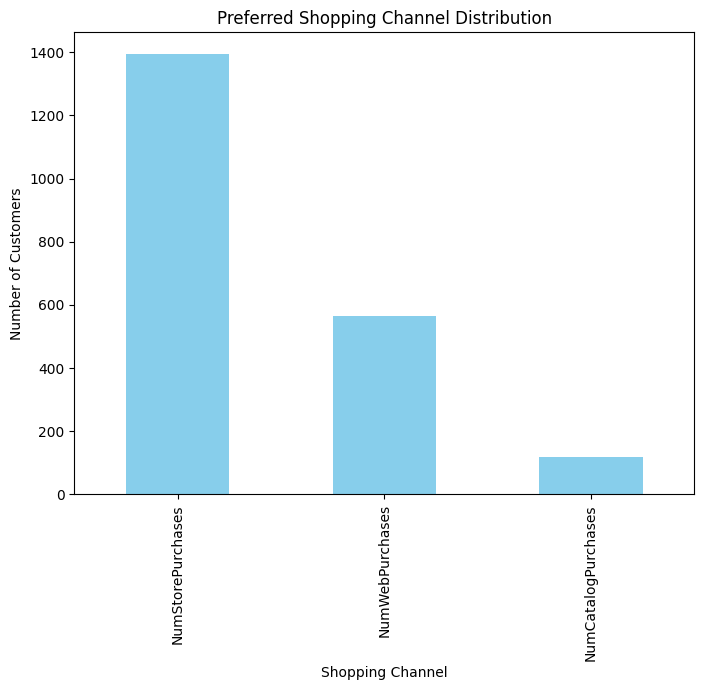

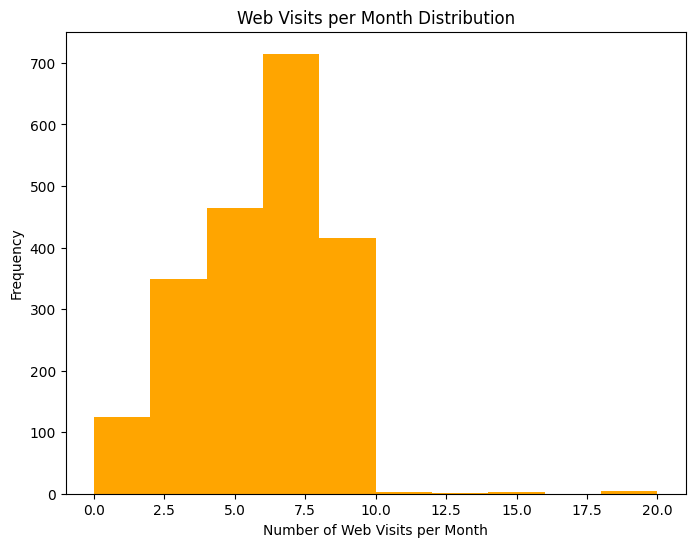

In [690]:
# Calculate total purchases and identify preferred channel
df['TotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['PreferredChannel'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)

# Plot preferred channel distribution
plt.figure(figsize=(8, 6))
df['PreferredChannel'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Preferred Shopping Channel Distribution")
plt.xlabel("Shopping Channel")
plt.ylabel("Number of Customers")
plt.show()

# Web Engagement Analysis (Web Visits per Month)
plt.figure(figsize=(8, 6))
df['NumWebVisitsMonth'].plot(kind='hist', bins=10, color='orange')
plt.title("Web Visits per Month Distribution")
plt.xlabel("Number of Web Visits per Month")
plt.ylabel("Frequency")
plt.show()


**b) Deal Sensitivity**

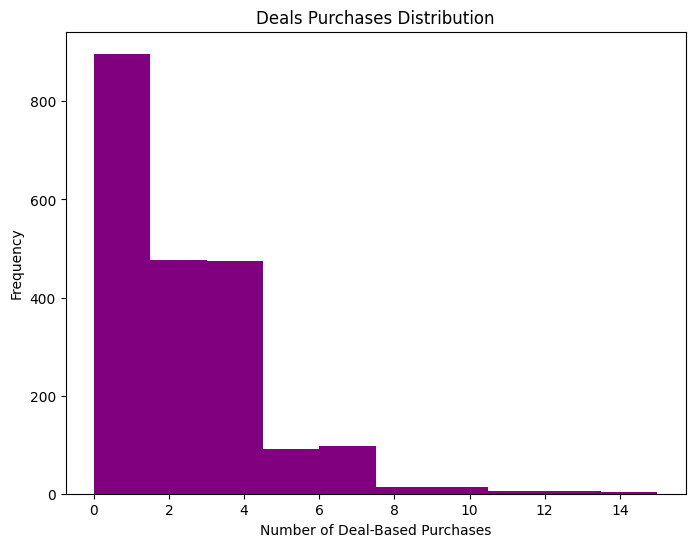

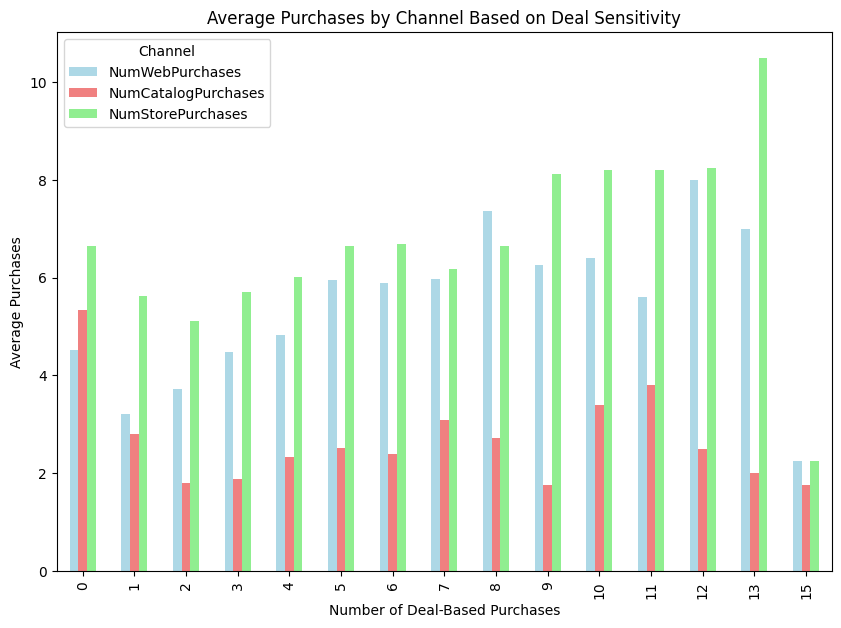

In [691]:
# Plot deals purchases distribution
plt.figure(figsize=(8, 6))
df['NumDealsPurchases'].plot(kind='hist', bins=10, color='purple')
plt.title("Deals Purchases Distribution")
plt.xlabel("Number of Deal-Based Purchases")
plt.ylabel("Frequency")
plt.show()

# Average purchases by channel for each level of deal sensitivity
channel_means = df.groupby('NumDealsPurchases')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

# Plot average purchases by channel based on deal sensitivity
channel_means.plot(kind='bar', figsize=(10, 7), stacked=False, color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title("Average Purchases by Channel Based on Deal Sensitivity")
plt.xlabel("Number of Deal-Based Purchases")
plt.ylabel("Average Purchases")
plt.legend(title="Channel")
plt.show()


**Actionable Insights**:
- Invest more in high-performing channels (e.g., more catalog campaigns if catalog customers have high lifetime value).
- Boost website experience for customers who visit frequently but do not purchase (e.g., better product recommendations, discounts for repeat visitors).


### 5. Why (Customer Motivations)


**Objective:** Uncover motivations behind customer behavior to improve targeting.


**a) Campaign Effectiveness**

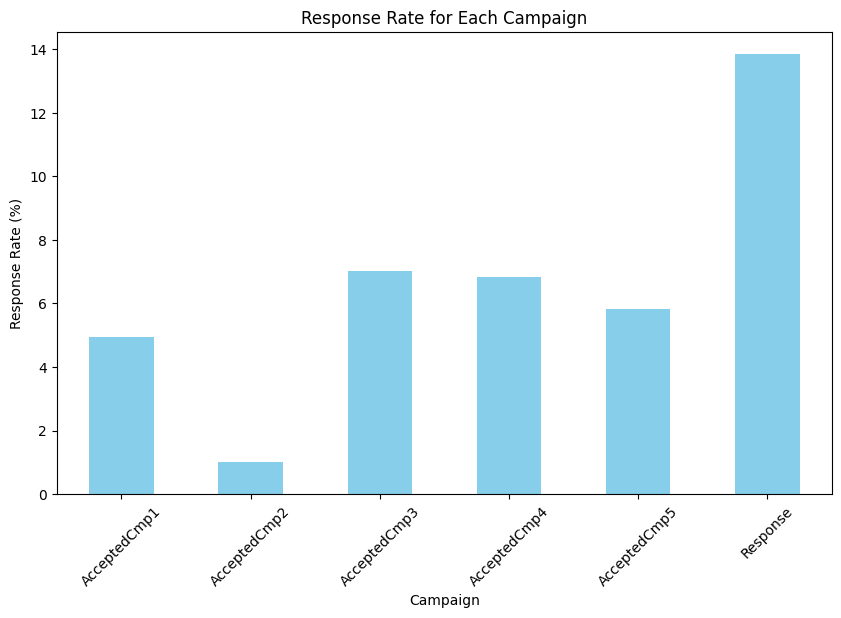

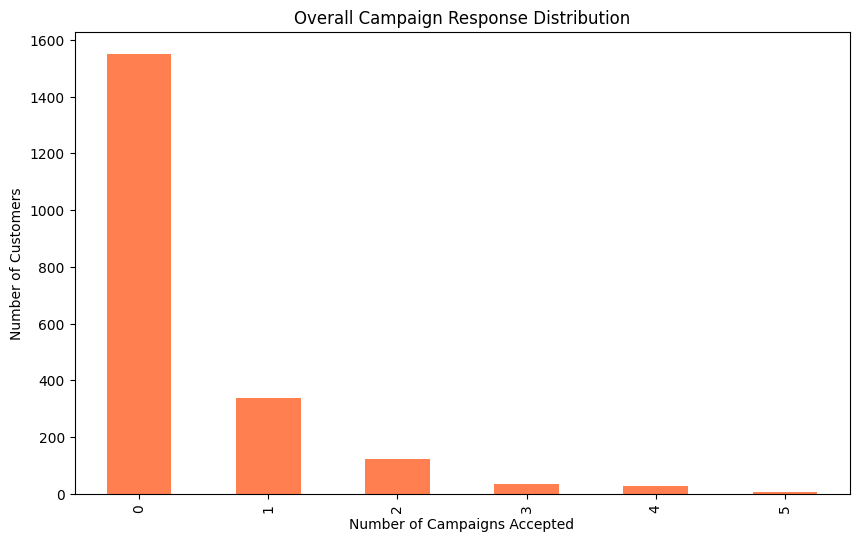

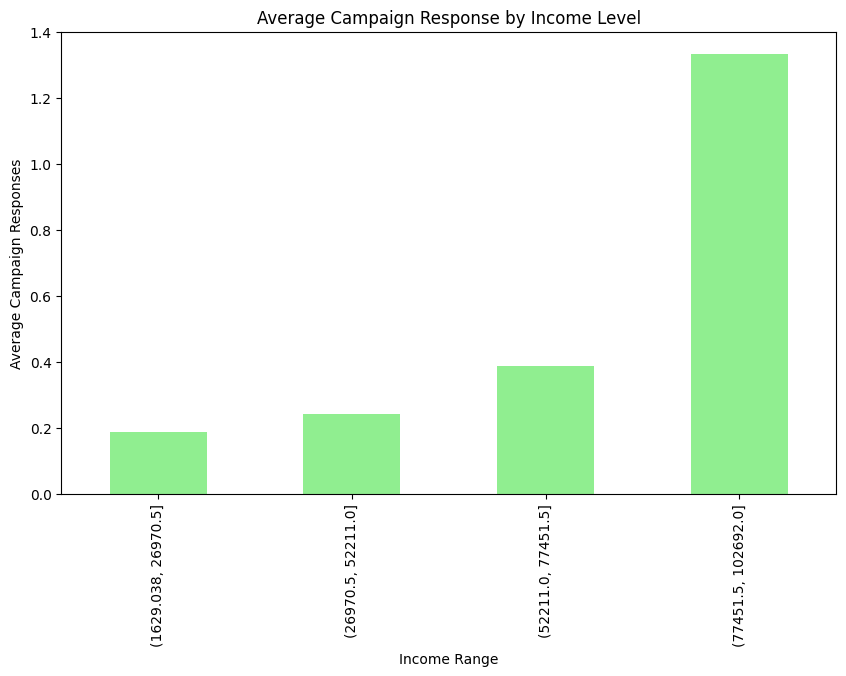

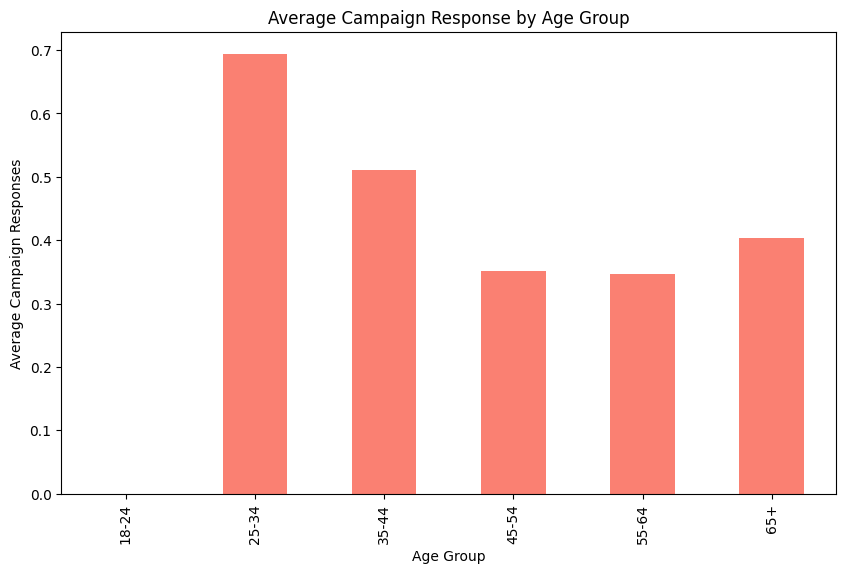

In [692]:
# Assuming campaign columns are: AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calculate total number of campaigns accepted by each customer
df['TotalCampaignResponses'] = df[campaign_columns].sum(axis=1)

# Calculate and plot the response rate for each individual campaign
campaign_response_rates = df[campaign_columns].mean() * 100  # Convert to percentage
plt.figure(figsize=(10, 6))
campaign_response_rates.plot(kind='bar', color='skyblue')
plt.title("Response Rate for Each Campaign")
plt.xlabel("Campaign")
plt.ylabel("Response Rate (%)")
plt.xticks(rotation=45)
plt.show()

# Calculate overall campaign effectiveness
total_campaign_responses = df['TotalCampaignResponses'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
total_campaign_responses.plot(kind='bar', color='coral')
plt.title("Overall Campaign Response Distribution")
plt.xlabel("Number of Campaigns Accepted")
plt.ylabel("Number of Customers")
plt.show()

# Campaign response by income level (assuming 'Income' is in the dataset)
income_campaign_response = df.groupby(pd.cut(df['Income'], bins=4))['TotalCampaignResponses'].mean()
income_campaign_response.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title("Average Campaign Response by Income Level")
plt.xlabel("Income Range")
plt.ylabel("Average Campaign Responses")
plt.show()

# Campaign response by age group (assuming 'AgeGroup' is in the dataset)
age_campaign_response = df.groupby('AgeGroup')['TotalCampaignResponses'].mean()
age_campaign_response.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title("Average Campaign Response by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Campaign Responses")
plt.show()


**b) Complaints**

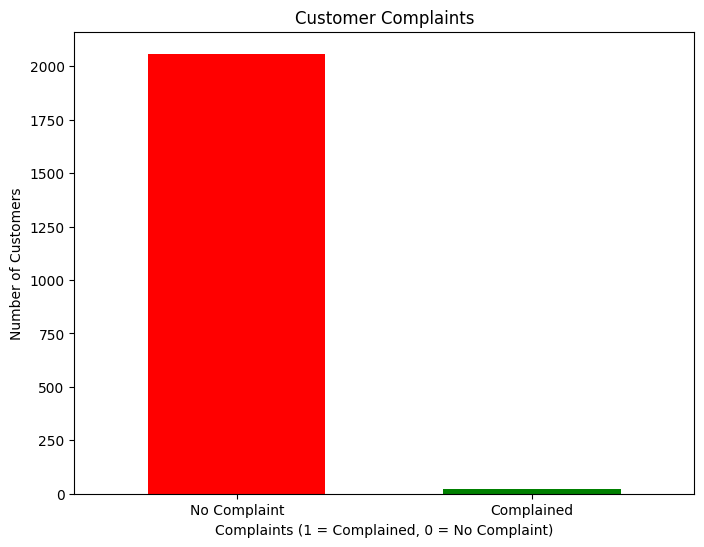

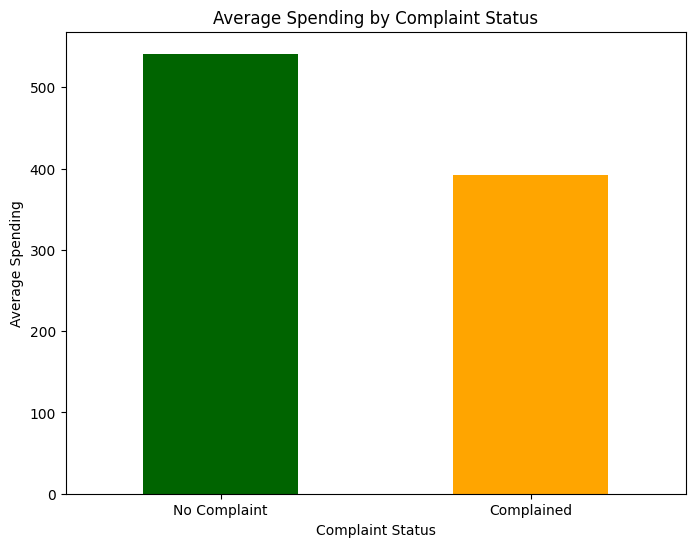

In [693]:
# Assuming df has a column 'Complain' where 1 indicates a complaint and 0 indicates no complaint

# Count the number of customers with and without complaints
complaint_counts = df['Complain'].value_counts()

# Plot complaints distribution
plt.figure(figsize=(8, 6))
complaint_counts.plot(kind='bar', color=['red', 'green'], width=0.6)
plt.title("Customer Complaints")
plt.xlabel("Complaints (1 = Complained, 0 = No Complaint)")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], labels=['No Complaint', 'Complained'], rotation=0)
plt.show()

# Compare average spending between customers who complained vs. those who didn't
avg_spending_complaint = df.groupby('Complain')['TotalExpenditure'].mean()
avg_spending_complaint.plot(kind='bar', color=['darkgreen', 'orange'], figsize=(8, 6))
plt.title("Average Spending by Complaint Status")
plt.xlabel("Complaint Status")
plt.ylabel("Average Spending")
plt.xticks([0, 1], labels=['No Complaint', 'Complained'], rotation=0)
plt.show()


### Insights and Recommendations

- **Optimize High-Performing Campaigns**: Invest more resources into the campaigns with the highest response rates, tailoring the types of offers that drive engagement.
- **Tailor Campaigns by Demographic**: For instance, affluent customers who are high campaign responders may appreciate exclusive product launches or loyalty benefits.
- **Consider Channel Preferences**: Younger customers or high-income segments may have specific channel preferences, such as web campaigns versus catalog or store promotions.

### **6. How** (Customer Segmentation and Profitability)

**Objective**: Implement RFM (Recency, Frequency, Monetary) analysis to segment customers and predict profitability.

**a) RFM Segmentation**

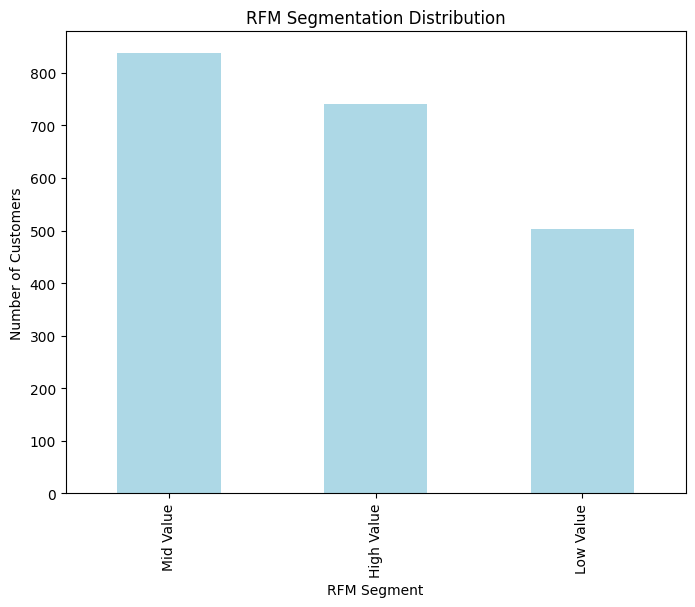

In [694]:
# Step 1: Define Recency, Frequency, and Monetary metrics

# Reference date for recency calculation (e.g., December 31, 2015)
reference_date = pd.to_datetime("2014-12-31")

# Convert Dt_Customer to datetime and calculate recency
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Recency'] = (reference_date - df['Dt_Customer']).dt.days

# Frequency (total number of purchases across all channels)
df['Frequency'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Monetary (total spending on all products)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Step 2: Calculate RFM scores by quartiles

# Recency score (1=most recent, 4=least recent)
df['R_Score'] = pd.qcut(df['Recency'], 4, labels=[4, 3, 2, 1])

# Frequency score (1=least frequent, 4=most frequent)
df['F_Score'] = pd.qcut(df['Frequency'], 4, labels=[1, 2, 3, 4])

# Monetary score (1=least spending, 4=most spending)
df['M_Score'] = pd.qcut(df['Monetary'], 4, labels=[1, 2, 3, 4])

# Step 3: Combine RFM scores into a single score
df['RFM_Score'] = df['R_Score'].astype(int) + df['F_Score'].astype(int) + df['M_Score'].astype(int)

# Step 4: Segment based on RFM score
df['RFM_Segment'] = pd.cut(df['RFM_Score'], bins=[2, 5, 8, 12], labels=['Low Value', 'Mid Value', 'High Value'])

# Plot distribution of RFM Segments
plt.figure(figsize=(8, 6))
df['RFM_Segment'].value_counts().plot(kind='bar', color='lightblue')
plt.title("RFM Segmentation Distribution")
plt.xlabel("RFM Segment")
plt.ylabel("Number of Customers")
plt.show()


**b) Customer Lifetime Value (CLV)**

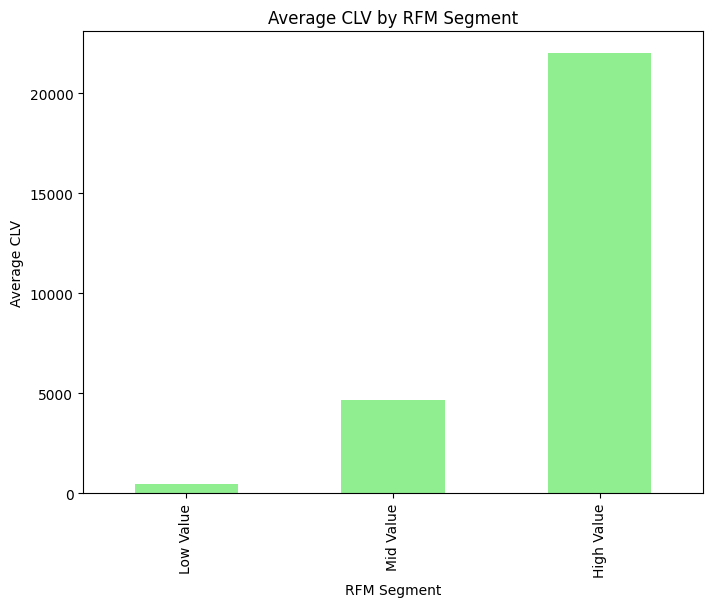

In [695]:
# Step 1: Calculate CLV based on RFM
df['CLV'] = df['Monetary'] * df['Frequency']

# Step 2: Calculate average CLV per RFM Segment
clv_segment = df.groupby('RFM_Segment')['CLV'].mean()

# Plot CLV by RFM Segment
plt.figure(figsize=(8, 6))
clv_segment.plot(kind='bar', color='lightgreen')
plt.title("Average CLV by RFM Segment")
plt.xlabel("RFM Segment")
plt.ylabel("Average CLV")
plt.show()


**c) Churn Risk**

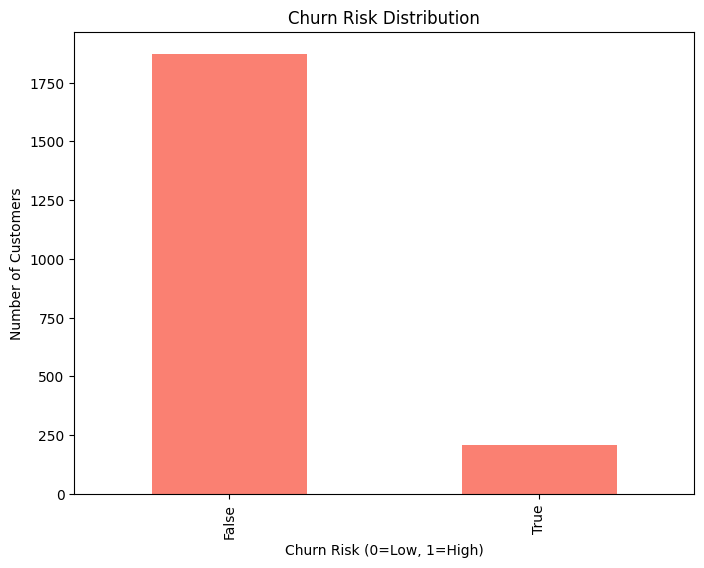

In [696]:
# Define churn risk based on RFM scores
# High Recency (low R_Score) and low Frequency and Monetary scores indicate risk
df['ChurnRisk'] = (df['R_Score'] == 1) & (df['F_Score'] < 3) & (df['M_Score'] < 3)

# Count of customers at risk of churn
churn_risk_counts = df['ChurnRisk'].value_counts()

# Plot churn risk distribution
plt.figure(figsize=(8, 6))
churn_risk_counts.plot(kind='bar', color='salmon')
plt.title("Churn Risk Distribution")
plt.xlabel("Churn Risk (0=Low, 1=High)")
plt.ylabel("Number of Customers")
plt.show()


**Actionable Insights**:
- Prioritize high-value, frequent customers for personalized offers and loyalty programs.
- Implement retention strategies for customers showing churn risk based on low recency or complaints.

In [697]:
df.to_csv("customer_data_modified.csv", index=False)